Ensembles are methods that combine multiple machine learning models to create
more powerful models. There are many models in the machine learning literature
that belong to this category, but there are two ensemble models that have proven to
be effective on a wide range of datasets for classification and regression, both of
which use decision trees as their building blocks: 
1. Random forests and 
2. Gradient boosted decision trees.


As we just observed, a main drawback of decision trees is that they tend to overfit the
training data. 

**Random forests are one way to address this problem**. 

A random forestis essentially **a collection of decision trees**, where each tree is slightly different from
the others. The idea behind random forests is that each tree might do a relatively
good job of predicting, but will likely overfit on part of the data. 

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount
of overfitting by ***averaging their results***. This reduction in overfitting, while retaining
the predictive power of the trees, can be shown using rigorous mathematics.

To implement this strategy, we need to **build many decision trees**. Each tree should do
an acceptable job of predicting the target, and should also be different from the other
trees. Random forests get their name from **injecting randomness into the tree building to ensure each tree is different.**

There are two ways in which the trees in a random forest are randomized: 
1. by selecting the data points used to build a tree and
2. by selecting the features in each split test. 

Let’s go into this process in more detail.

### Building random forests. 

1. To build a random forest model, you need to decide on the
number of trees to build (the n_estimators parameter of RandomForestRegressor or
RandomForestClassifier). Let’s say we want to build 10 trees

2. These trees will be
built completely independently from each other, and the algorithm will make different random choices for each tree to make sure the trees are distinct 


3. These trees will be
built completely independently from each other, and the algorithm will make differ‐
ent random choices for each tree to make sure the trees are distinct

4. To build a tree, we first take what is called a **bootstrap sample** of our data. That is, from our n_samples
data points, we repeatedly draw an example randomly with replacement (meaning the
same sample can be picked multiple times), n_samples times. This will create a data‐
set that is as big as the original dataset, but some data points will be missing from it
(approximately one third), and some will be repeated.

To illustrate, let’s say we want to create a bootstrap sample of the list ['a', 'b',
'c', 'd']. A possible bootstrap sample would be ['b', 'd', 'd', 'c']. Another
possible sample would be ['d', 'a', 'd', 'a'].


Due to bootstrap sampling, each decision tree in the random forest is built on a slightly different dataset. The feature selection in each node ensures that every split in every tree operates on a different subset of features, ensuring diversity among all the trees.

The crucial parameter, max_features, influences the degree of similarity among trees. A high value means trees are similar, easily fitting data with distinctive features. A low value means trees are different, potentially requiring greater depth for accurate data fitting.

For prediction, the algorithm predicts for each tree in the forest. In regression, results are averaged for the final prediction. In classification, a “soft voting” strategy is used, where each algorithm makes a “soft” prediction, providing a probability for each possible output label.

The maxFeatures parameter in a random forest controls the number of features considered for splitting at each node in a tree. Here's the breakdown:

- *Higher Value:* If set to a higher value, it allows more features to be considered at each split. This might lead to trees that are more similar to each other.

- *Lower Value:* Conversely, if set to a lower value, each tree in the forest will consider only a subset of features at each split. This encourages diversity among the trees.

- *Impact on Depth:* If you have a lower maxFeatures, allowing each node to decide using distinct features, you might need deeper trees for accurate data fitting.

So, adjusting maxFeatures influences the trade-off between similarity and diversity among the trees. Does that clarify things, or do you have more questions on this?

### Analyzing random forests

Let’s apply a random forest consisting of five trees to the
two_moons dataset we studied earlier:

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

The trees that are built as part of the random forest are stored in the estimator_
attribute. Let’s visualize the decision boundaries learned by each tree, together with
their aggregate prediction as made by the forest

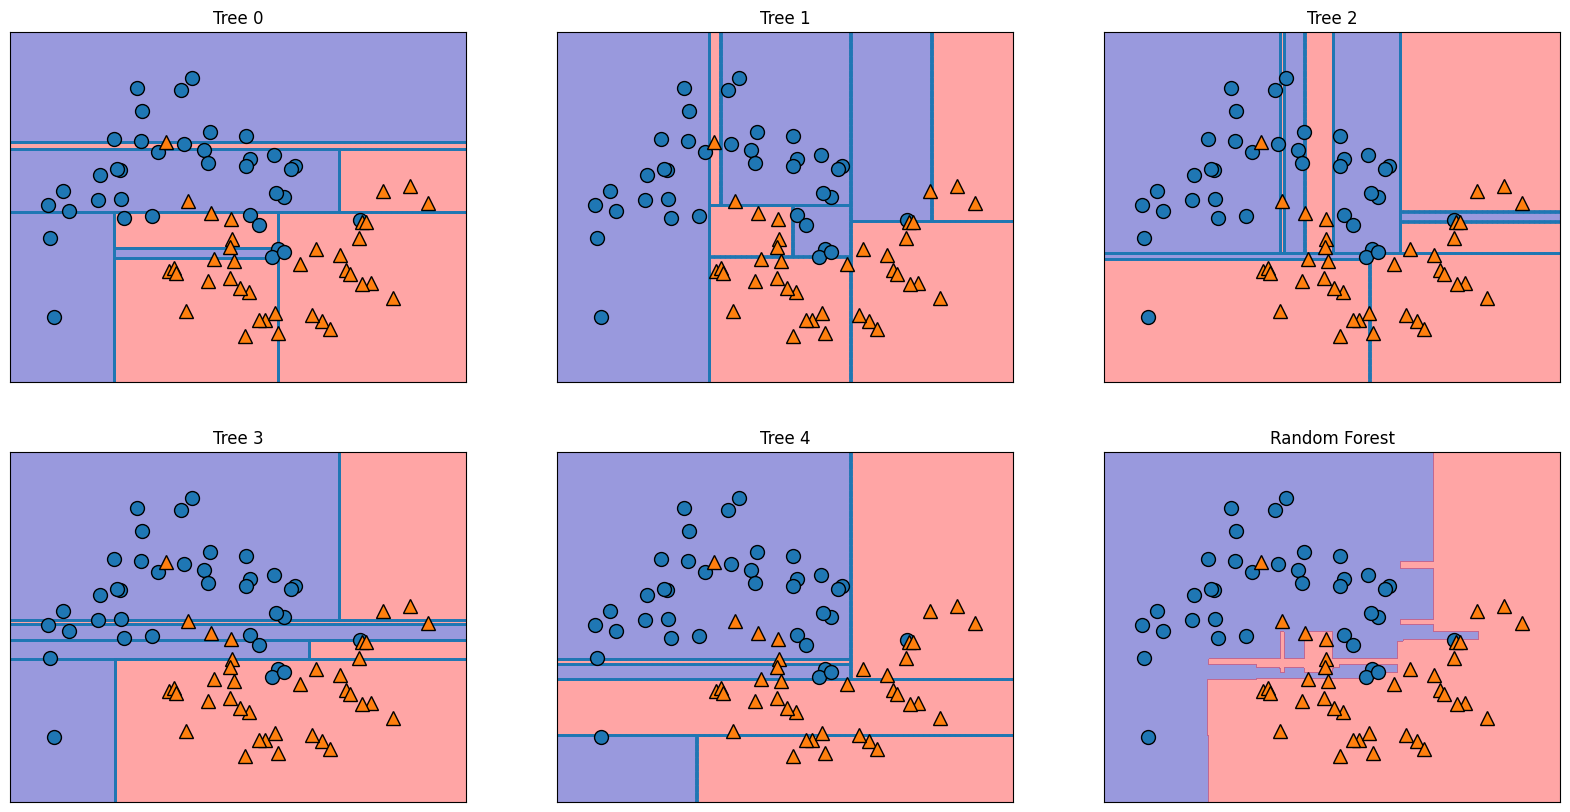

In [4]:
import mglearn
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("Tree {}".format(i))
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
 alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


You can clearly see that the decision boundaries learned by the five trees are quite dif‐
ferent. Each of them makes some mistakes, as some of the training points that are
plotted here were not actually included in the training sets of the trees, due to the
**bootstrap sampling.**


The random forest overfits less than any of the trees individually, and provides a
much more intuitive decision boundary. In any real application, we would use many
more trees (often hundreds or thousands), leading to even smoother boundaries.


#### As another example, let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset:


In [6]:
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives us an accuracy of 97%, better than the linear models or a
single decision tree, without tuning any parameters

 We could adjust the max_fea
tures setting, or apply pre-pruning as we did for the single decision tree. However,
often the default parameters of the random forest **already work quite well**.


Similarly to the decision tree, the random forest provides feature importances, which
are computed by aggregating the feature importances over the trees in the forest. Typ‐
ically, the ***feature importances*** provided by the random forest are more reliable than
the ones provided by a single tree.

#### Providing feature importance

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (2,) and arg 3 with shape (30,).

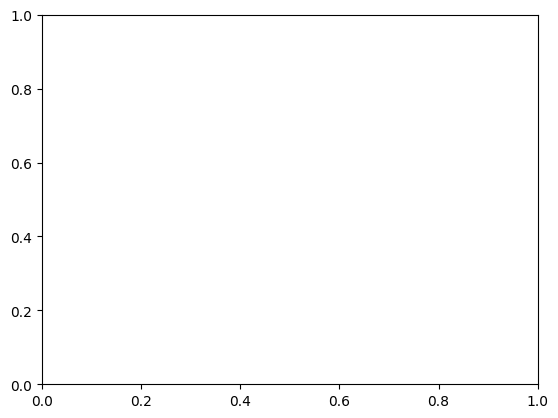

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

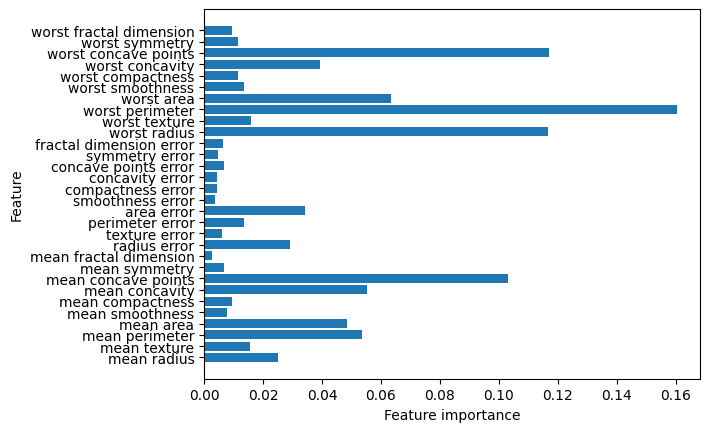

In [12]:
plot_feature_importances_cancer(forest)


As you can see, the random forest gives nonzero importance to many more features
than the single tree. Similarly to the single decision tree, the random forest also gives
a lot of importance to the “worst radius” feature, but it actually chooses **“worst perimeter”** to be the most informative feature overall. 

The randomness in building the ran‐
dom forest forces the algorithm to consider many possible explanations, the result
being that the random forest captures a much broader picture of the data than a sin‐
gle tree.


### Pros and strength of Random Forests

Random forests for regression and classifica‐
tion are currently among the ***most widely used machine learning methods***. They are
very powerful, often work well without heavy tuning of the parameters, and don’t
require scaling of the data.

1. High Predictive Accuracy: Random Forests offer superior accuracy, making them well-suited for diverse applications.
2. Overfitting Mitigation: Aggregating predictions from multiple trees helps counter overfitting, enhancing generalization.
3. Robust Performance: Random Forests demonstrate robustness, as their effectiveness is less impacted by specific random states.

### Cons and Weakness of Random Forests

1. Random Forests inherit the strengths of decision trees while addressing certain limitations. Decision trees offer a concise representation of decision-making but become challenging to interpret with tens or hundreds of trees. Random Forests, though deeper due to feature subsets, shine in summarizing predictions visually.

2. Large datasets may prolong Random Forest training, yet parallelization across multiple CPU cores facilitates faster computation. The 'n_jobs' parameter optimizes core usage, enhancing efficiency. Notably, setting 'n_jobs=-1' engages all available cores.

3. Considering their random nature, varied random states significantly influence Random Forest models. To ensure reproducibility, fixing the 'random_state' is crucial. A higher number of trees fosters robustness against random state variations.

4. Despite excelling with large datasets, Random Forests exhibit limitations on **high-dimensional, sparse data like text (as most of the word won't appear in doc so most of the word would be 0 so random forest won't be able to find pattern)**.
 **Linear models may be more suitable for such cases**. While offering parallelization benefits, Random Forests demand more memory and entail slower training and prediction than linear models.



5. Interpretability Challenge: The ensemble structure poses challenges in interpreting and summarizing decisions for non-experts.


6. Resource Intensity: Training on large datasets may demand substantial time and memory resources, affecting computational efficiency.


7. Random Nature Impact: The inherent randomness means different random states can result in distinct models. Achieving reproducibility requires fixing the random state.